### Table of Contents

* [1. Imports des librairies ](#Imports1)
* [2. Imports des bases des données ](#DATA2)
* [3. Analyse non supervisée ](#ANS3)
  * [3.1 LDA ](#LDA_3_1)
  * [3.2 NMF](#NMF_3_2)

* [4. Analyse supervisée ](#AS_4)
  * [4.1.Modèle LogisticRegressor](#MLR_4_1)
  * [4.2.Modèle SGDClassifier](#SGD_4_2)
  * [4.3.Modèle KNN](#KNN_4_3)
  * [4.4.Modèle SVM](#SVM_4_4)
  * [4.5.Modèle RandomForestClassifier](#RFC_4_5)
  * [4.6.Modèle GradientBoostingClassifier](#GBC_4_6)
  * [4.7.word2vec embedding](#W2V_4_7)
  * [4.8.BERT embedding](#BERT_4_8)
     * [4.8.1 BERT hub Tensorflow ](#BHT_4_8_1)
     * [4.8.2 Universal sentence-transformers ](#UST_4_8_2)
     * [4.8.3 Universal Sentence Encoder](#USE_4_8_3)

### 1.Imports des librairies  <a class="anchor" id="Imports1"></a>

### 2.Imports de la base des données  <a class="anchor" id="DATA2"></a>

### 3.Analyse non supervisée  <a class="anchor" id="ANS3"></a>

#### 3.1.LDA <a class="anchor" id="LDA_3_1"></a>

#### 3.2 NMF  <a class="anchor" id="NMF_3_2"></a>

### 4 Analyse supervisée <a class="anchor" id="AS_4"></a>

#### 4.1.Modèle LogisticRegressor <a class="anchor" id="MLR_4_1"></a>
#### 4.2.Modèle SGDClassifier <a class="anchor" id="SGD_4_2"></a>
#### 4.3.Modèle KNN<a class="anchor" id="KNN_4_3"></a>
#### 4.4.Modèle SVM<a class="anchor" id="SVM_4_4"></a>
#### 4.5.Modèle RandomForestClassifier <a class="anchor" id="RFC_4_5"></a>
#### 4.6.Modèle GradientBoostingClassifier <a class="anchor" id="GBC_4_6"></a>
#### 4.7.word2vec embedding <a class="anchor" id="W2V_4_7"></a>
#### 4.8.BERT embedding <a class="anchor" id="BERT_4_8"></a>

##### 4.8.1 BERT hub Tensorflow<a class="anchor" id="BHT_4_8_1"></a>
##### 4.8.2 Universal sentence-transformers  <a class="anchor" id="UST_4_8_2"></a>
##### 4.8.3 Universal Sentence Encoder  <a class="anchor" id="USE_4_8_3"></a>


### 1.Imports des librairies  <a class="anchor" id="Imports1"></a>

In [1]:
#python libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

### 2.Imports de la base des données  <a class="anchor" id="DATA2"></a>

In [2]:
#Import the cleaned dataset

data=pd.read_csv(filepath_or_buffer='data_cleaned.csv',sep=';')
data

,Title,Body,Tags,text_comb
0,"['statement', 'handle', 'react', 'native', 'ex...","['library', 'tree', 'hurt', 'presets', 'locale...","['io', 'javascript', 'react', 'android']","['library', 'tree', 'hurt', 'presets', 'locale..."
1,"['message', 'user', 'phonegap', 'cordova', 'ap...","['username', 'need', 'particular', 'phonegap',...","['mvc', 'net', 'android', 'asp']","['username', 'need', 'particular', 'phonegap',..."
2,"['undeclared', 'identifier', 'trackbar', 'comm...","['problem', 'file', 'undeclared', 'trackbar', ...","['window', 'c']","['problem', 'file', 'undeclared', 'trackbar', ..."
3,"['woocommerce', 'product', 'create', 'programm...","['problem', 'click', 'product', 'edit', 'shop'...","['mysql', 'php']","['problem', 'click', 'product', 'edit', 'shop'..."
4,"['ubuntu', 'bit', 'java', 'possible']","['need', 'run', 'sun', 'download', 'us', 'foll...","['linux', 'java']","['run', 'need', 'sun', 'download', 'us', 'foll..."
...,...,...,...,...
33159,"['python', 'file', 'read']","['pattern', 'file', 'follow', 'point', 'panda'...","['file', 'python']","['pattern', 'file', 'read', 'panda', 'point', ..."
33160,"['j', 'file', 'path', 'static', 'node']","['file', 'run', 'question', 'server', 'console...","['html', 'j', 'file', 'javascript', 'server', ...","['file', 'run', 'question', 'server', 'console..."
33161,"['xml', 'resource', 'library', 'module', 'font...","['library', 'file', 'directly', 'point', 'unab...","['xml', 'android']","['library', 'file', 'directly', 'point', 'unab..."
33162,"['file', 'interfere', 'redirect', 'htaccess', ...","['up', 'work', 'need', 'file', 'ltd', 'forward...",['php'],"['up', 'work', 'need', 'file', 'ltd', 'forward..."


In [3]:
from ast import literal_eval
for col in ['Title', 'Body', 'Tags', 'text_comb']:
     data[col] = data[col].apply(literal_eval)

In [4]:
data.head()

,Title,Body,Tags,text_comb
0,"[statement, handle, react, native, exception, ...","[library, tree, hurt, presets, locale, found, ...","[io, javascript, react, android]","[library, tree, hurt, presets, locale, found, ..."
1,"[message, user, phonegap, cordova, app, specif...","[username, need, particular, phonegap, time, a...","[mvc, net, android, asp]","[username, need, particular, phonegap, time, a..."
2,"[undeclared, identifier, trackbar, commctrl, w...","[problem, file, undeclared, trackbar, bat, ins...","[window, c]","[problem, file, undeclared, trackbar, bat, com..."
3,"[woocommerce, product, create, programmatically]","[problem, click, product, edit, shop, enter, a...","[mysql, php]","[problem, click, product, edit, shop, enter, a..."
4,"[ubuntu, bit, java, possible]","[need, run, sun, download, us, follow, tomcat,...","[linux, java]","[run, need, sun, download, us, follow, tomcat,..."


In [5]:
%%time
# Define X and y
X = data["text_comb"]
y = data["Tags"]

# Initialize the "CountVectorizer" TFIDF for text_comb
vectorizer = TfidfVectorizer(analyzer="word",
                             max_df=.97,
                             min_df= 3,
                             tokenizer=None,
                             preprocessor=' '.join,
                             stop_words=None,
                             lowercase=False)
vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

print("Shape of X for Full_doc: {}".format(X_tfidf.shape))

# Multilabel binarizer for targets
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(y)
y_binarized = multilabel_binarizer.transform(y)

print(f"Shape of y:              {y_binarized.shape}")

Shape of X for Full_doc: (33164, 12734)
Shape of y:              (33164, 50)
Wall time: 3.3 s


In [6]:
# Create train and test split (25%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_binarized,
                                                    test_size=0.25, random_state=42)
print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (24873, 12734)
X_test shape : (8291, 12734)
y_train shape : (24873, 50)
y_test shape : (8291, 50)


### 3.Analyse non supervisée  <a class="anchor" id="ANS3"></a>

#### 3.1.LDA <a class="anchor" id="LDA_3_1"></a>

In [8]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [9]:
# Create dictionnary (bag of words)
id2word = corpora.Dictionary(X)
id2word.filter_extremes(no_below=4, no_above=0.6, keep_n=None)
# Create Corpus 
texts = X  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  
# View 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)]]


In [10]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 1),
  ('actually', 1),
  ('ask', 1),
  ('basically', 1),
  ('blob', 1),
  ('case', 1),
  ('catch', 1),
  ('choose', 1),
  ('code', 1),
  ('com', 1),
  ('develop', 1),
  ('display', 1),
  ('dr', 1),
  ('en', 1),
  ('example', 1),
  ('exception', 1),
  ('exist', 1),
  ('fall', 1),
  ('forth', 1),
  ('found', 1),
  ('get', 1),
  ('github', 1),
  ('give', 1),
  ('handle', 1),
  ('http', 1),
  ('hurt', 1),
  ('implement', 1),
  ('instead', 1),
  ('issue', 1),
  ('j', 1),
  ('lib', 1),
  ('library', 1),
  ('like', 1),
  ('locale', 1),
  ('logic', 1),
  ('module', 1),
  ('moment', 1),
  ('move', 1),
  ('native', 1),
  ('opinion', 1),
  ('option', 1),
  ('preset', 1),
  ('react', 1),
  ('red', 1),
  ('request', 1),
  ('require', 1),
  ('screen', 1),
  ('src', 1),
  ('statement', 1),
  ('suitable', 1),
  ('thought', 1),
  ('tl', 1),
  ('tree', 1),
  ('try', 1),
  ('use', 1),
  ('want', 1)]]

In [11]:
# Build LDA model
full_lda_model = gensim.models.ldamulticore\
                    .LdaMulticore(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=20,
                                  random_state=8,
                                  per_word_topics=True,
                                  workers=4)
# Print Perplexity score
print('\nPerplexity: ', full_lda_model.log_perplexity(corpus))

#Print Coherence Score
coherence_model_lda = CoherenceModel(model=full_lda_model, 
                                     texts=texts, 
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.664962691680517

Coherence Score:  0.379565699187271


In [12]:
from IPython.core.display import display, HTML

In [13]:
pyLDAvis.enable_notebook()
%matplotlib inline

display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

gensimvis.prepare(full_lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9     -0.010280 -0.007538       1        1  7.102611
4      0.009592 -0.024271       2        1  6.674357
8     -0.020244  0.017379       3        1  6.265044
10     0.050937 -0.026775       4        1  6.235778
15     0.011644  0.003502       5        1  6.092066
7     -0.010298  0.002551       6        1  5.985016
2     -0.006056  0.013154       7        1  5.962320
11     0.023907 -0.004424       8        1  5.697853
3     -0.005893 -0.009318       9        1  5.614354
17    -0.045125 -0.033901      10        1  5.145974
13    -0.020064  0.029396      11        1  5.140213
1      0.016857 -0.003665      12        1  4.978431
19     0.024405  0.012578      13        1  4.950247
0      0.012044 -0.022619      14        1  4.785905
14    -0.009301  0.012392      15        1  3.770311
16    -0.043265 -0.006235      16        1  3.639947
12     0.010352  0.034321      17        1  3.505208
6      0.019265  0.005835      18        1  3.197843
18     0.004786  0.030662      19        1  3.067037
5     -0.013262 -0.023025      20        1  2.189482, topic_info=        Term         Freq        Total Category  logprob  loglift
55      want  9408.000000  9408.000000  Default  30.0000  30.0000
54       use  9157.000000  9157.000000  Default  29.0000  29.0000
152      run  6120.000000  6120.000000  Default  28.0000  28.0000
144    error  7718.000000  7718.000000  Default  27.0000  27.0000
322   server  4175.000000  4175.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
214     look   110.726124  4991.340881  Topic20  -5.4758   0.0131
65    create   122.041738  6818.091516  Topic20  -5.3785  -0.2015
322   server   103.012394  4175.862551  Topic20  -5.5480   0.1193
14   example   101.568271  4554.229471  Topic20  -5.5621   0.0184
197     know   105.009208  5895.238930  Topic20  -5.5288  -0.2063

[1636 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
369       1  0.075347           #
369       2  0.114052           #
369       3  0.090829           #
369       4  0.027352           #
369       5  0.041286           #
...     ...       ...         ...
2407      2  0.082225    zoomable
2407     11  0.082225    zoomable
2407     12  0.164449    zoomable
2407     18  0.575572    zoomable
9036     10  0.713736  zygoteinit

[6623 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 9, 11, 16, 8, 3, 12, 4, 18, 14, 2, 20, 1, 15, 17, 13, 7, 19, 6])

In [14]:
# Iter LDA for best number of topics
coherence_test = []
for k in np.arange(1,90,10):
    print("Fitting LDA for K = {}".format(k))
    start_time = time.time()
    lda_model = gensim.models.ldamulticore\
                    .LdaMulticore(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=k,
                                  random_state=8,
                                  per_word_topics=True,
                                  workers=4)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=texts,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    end_time = time.time()
    coherence_test.append((k, coherence_lda,
                           (end_time - start_time)))

Fitting LDA for K = 1
Fitting LDA for K = 11
Fitting LDA for K = 21
Fitting LDA for K = 31
Fitting LDA for K = 41
Fitting LDA for K = 51
Fitting LDA for K = 61
Fitting LDA for K = 71
Fitting LDA for K = 81


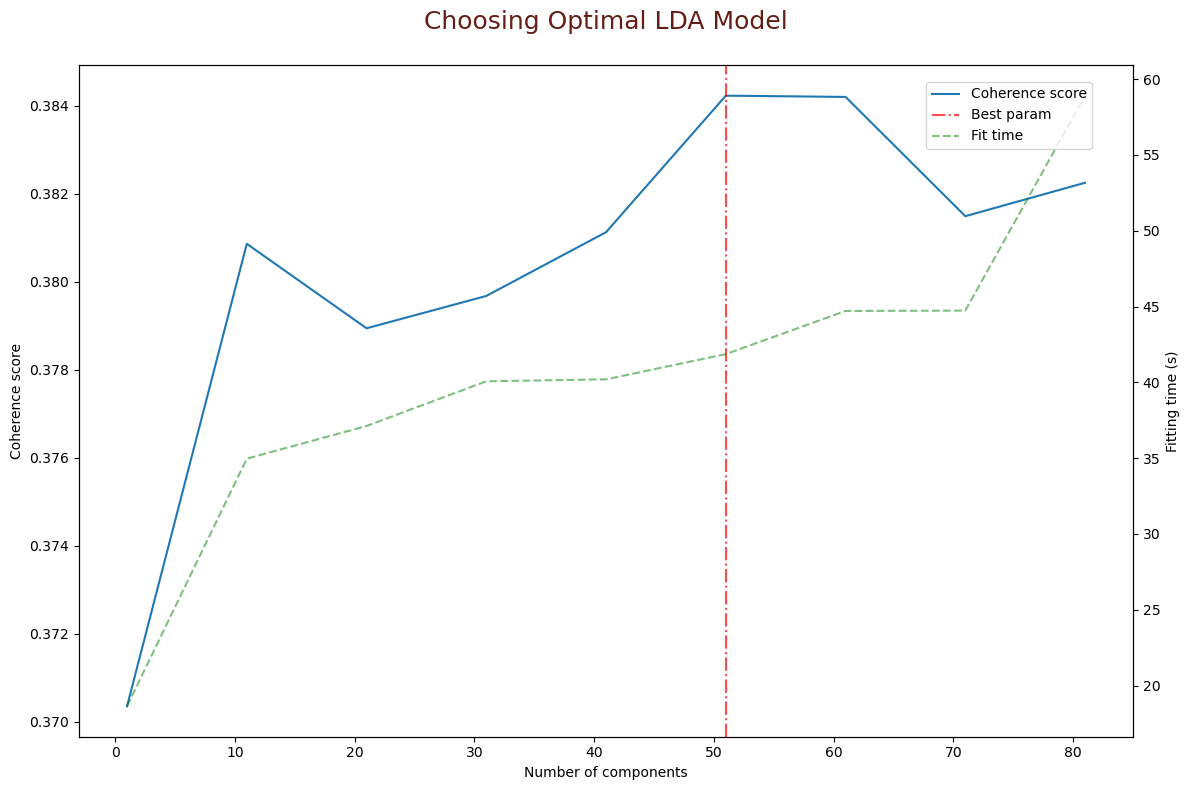

In [15]:
# Create dataframe of results
coherence_test = pd.DataFrame(coherence_test,
                              columns=["k","coherence","time"])

# Select best number of topics
best_nb_topics = coherence_test\
                    .loc[coherence_test.coherence.argmax(),"k"]

# Plot results
fig, ax1 = plt.subplots(figsize=(12,8))
x = coherence_test["k"]
y1 = coherence_test["coherence"]
y2 = coherence_test["time"]

ax1.plot(x, y1, label="Coherence score")
ax1.axvline(x=best_nb_topics, color='r', alpha=.7,
            linestyle='dashdot', label='Best param')
ax1.set_xlabel("Number of components")
ax1.set_ylabel("Coherence score")

ax2 = ax1.twinx()
ax2.plot(x, y2, label="Fit time",
         color='g', alpha=.5,
         linestyle='--')
ax2.set_ylabel("Fitting time (s)")

plt.title("Choosing Optimal LDA Model\n",
          color="#641E16", fontsize=18)
legend = fig.legend(loc=1, bbox_to_anchor=(.92, .9))

fig.tight_layout()
plt.show()

In [16]:
# Best LDA visualization
# Construire le modèle LDA
best_lda_model = gensim.models.ldamulticore\
                    .LdaMulticore(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=best_nb_topics,
                                  random_state=8,
                                  per_word_topics=True,
                                  workers=4)
gensimvis.prepare(best_lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
32    -0.009619 -0.031344       1        1  3.798452
37    -0.002372 -0.013662       2        1  3.653798
46     0.013619  0.029613       3        1  3.162662
50    -0.009305  0.027197       4        1  2.967010
9      0.012766 -0.007509       5        1  2.931571
44    -0.005684  0.021546       6        1  2.752088
28     0.020190  0.005288       7        1  2.726478
36    -0.004943 -0.011892       8        1  2.718514
15    -0.021405  0.014171       9        1  2.440261
30     0.001069  0.019405      10        1  2.434578
3      0.000026 -0.013228      11        1  2.402893
26     0.016574  0.014090      12        1  2.357676
29     0.024438  0.026093      13        1  2.304821
1     -0.025533 -0.023248      14        1  2.294317
17     0.042118 -0.021341      15        1  2.280051
2      0.000352  0.003141      16        1  2.191856
22    -0.098560 -0.012461      17        1  2.151134
35     0.042124  0.030512      18        1  2.136247
10    -0.037996 -0.037408      19        1  2.106578
11    -0.021692 -0.033795      20        1  2.074114
8      0.022884 -0.005020      21        1  2.066333
7      0.004961  0.011612      22        1  2.035150
4     -0.004124 -0.013399      23        1  2.009434
19    -0.028670 -0.000360      24        1  1.967454
38    -0.024451 -0.023754      25        1  1.920408
43    -0.013013 -0.034934      26        1  1.905530
25    -0.013062  0.016245      27        1  1.896553
14     0.006215  0.012471      28        1  1.889850
48     0.017208  0.025076      29        1  1.842653
0     -0.011222 -0.012919      30        1  1.800139
49     0.015430 -0.002120      31        1  1.797795
23     0.016921 -0.002919      32        1  1.787747
13     0.009164 -0.012333      33        1  1.774656
39     0.009761  0.010951      34        1  1.758609
21     0.005192 -0.035705      35        1  1.732673
41     0.018768 -0.006464      36        1  1.642804
20     0.009345  0.009998      37        1  1.599817
6      0.013875 -0.023297      38        1  1.475512
42     0.012246  0.000311      39        1  1.451653
47     0.005658  0.017324      40        1  1.398851
16     0.029964 -0.038196      41        1  1.375599
40    -0.029086 -0.005032      42        1  1.234593
31    -0.053055  0.072485      43        1  1.217166
34     0.027232  0.000500      44        1  1.215307
33    -0.034826 -0.005622      45        1  1.170088
18     0.006516  0.007829      46        1  1.165485
12    -0.013240  0.015091      47        1  1.129224
24     0.059703 -0.018524      48        1  1.119520
27    -0.023494 -0.008312      49        1  1.056232
5      0.024849 -0.014255      50        1  0.997663
45    -0.003814  0.078106      51        1  0.680401, topic_info=        Term          Freq         Total Category  logprob  loglift
144    error   7956.000000   7956.000000  Default  30.0000  30.0000
8       code  13098.000000  13098.000000  Default  29.0000  29.0000
54       use   9155.000000   9155.000000  Default  28.0000  28.0000
53       try  14697.000000  14697.000000  Default  27.0000  27.0000
213    image   3426.000000   3426.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
369        #     29.954004   1911.356898  Topic51  -5.6144   0.8343
186    class     31.702680   3446.616862  Topic51  -5.5577   0.3015
74   message     30.199229   2130.930517  Topic51  -5.6063   0.7337
207      add     31.903517   5375.338508  Topic51  -5.5514  -0.1366
279     find     30.526266   3988.144659  Topic51  -5.5955   0.1177

[3971 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
369       1  0.044994           #
369       2  0.028252           #
369       3  0.054935           #
369       4  0.020928           #
369       5  0.023020           #
...     ...       ...         ...
2407     16  0.050741 

In [17]:
# Initialize the "CountVectorizer" TFIDF for Full_doc
vectorizer = TfidfVectorizer(analyzer="word",
                             max_df=.6,
                             min_df=0.005,
                             tokenizer=None,
                             preprocessor=' '.join,
                             stop_words=None,
                             lowercase=False)

vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

print("Shape of X for Full_doc: {}".format(X_tfidf.shape))

# Multilabel binarizer for targets
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(y)
y_binarized = multilabel_binarizer.transform(y)

print("Shape of y: {}".format(y_binarized.shape))

Shape of X for Full_doc: (33164, 1145)
Shape of y: (33164, 50)


In [18]:
# Calculate Document/topic matrix with Gensim
doc_topic = pd.DataFrame(best_lda_model\
                             .get_document_topics(corpus,
                                                  minimum_probability=0))
for topic in doc_topic.columns:
    doc_topic[topic] = doc_topic[topic].apply(lambda x : x[1])

print('document/tag : ', y_binarized.shape)
print('document/topic : ', doc_topic.shape)

document/tag :  (33164, 50)
document/topic :  (33164, 51)


In [19]:
# Print documents / topic matrix
doc_topic.head(3)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,...,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.746719,0.000344,0.000344
1,0.000344,0.374957,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.451175,...,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.157345
2,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818,...,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818,0.000818


In [20]:
# Matricial multiplication with Document / Topics transpose
topic_tag = np.matmul(doc_topic.T, y_binarized)
topic_tag.shape

(51, 50)

In [21]:
topic_tag

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,28.032194,4.804158,22.409592,11.241130,4.898345,26.593877,15.026844,51.620328,12.009537,58.324568,...,49.609584,16.500174,6.719124,8.952612,10.656820,6.990124,21.706266,11.242996,14.387265,5.882725
1,19.990243,6.079700,113.981264,11.375457,10.196201,31.279995,31.414235,29.196586,23.242511,85.025918,...,5.298552,78.877082,18.718027,17.826523,12.132203,11.170097,29.376879,21.636533,18.654678,16.730484
2,6.036851,11.076882,32.141365,12.251966,12.797581,25.994472,12.347498,17.731377,17.512001,46.193208,...,7.877655,13.544885,17.354307,3.406098,30.687053,14.014466,36.368543,40.107558,60.676042,17.397812
3,7.851436,3.604543,66.899602,2.854430,16.199830,23.707870,20.473951,38.553858,14.711775,127.687524,...,62.295832,115.810459,21.800069,10.370855,13.665381,19.188176,23.895356,15.238813,14.430541,26.618239
4,52.984554,11.267402,26.847582,7.280246,22.361637,29.243754,15.148915,108.259370,21.951662,118.557823,...,27.464654,60.841380,10.215797,15.306987,5.390216,9.792003,39.327460,12.937452,8.082498,12.855838
5,6.291729,3.065712,12.669158,5.605093,6.747139,11.358186,7.068073,22.186605,19.055795,49.301971,...,8.487818,20.707541,11.638395,2.770503,4.261245,10.549913,14.375786,20.672271,4.308814,8.404445
6,2.249677,15.681035,25.057141,2.466425,10.957649,18.909940,8.599681,16.934032,26.117527,44.243871,...,10.023118,30.381514,7.359232,6.908567,6.304938,7.555140,20.763659,20.314965,9.842562,1.975295
7,19.180035,3.449631,42.296254,13.869389,8.177092,38.605128,10.445166,84.450290,16.972917,93.021787,...,38.707854,11.442431,18.537070,18.113291,44.789592,16.060161,43.480434,8.689667,16.470149,7.223670
8,1.430263,11.280819,29.753893,3.395124,10.447061,15.410776,34.743709,15.416653,58.821291,77.000695,...,18.354120,42.660572,32.703926,10.318964,10.323878,33.744373,18.732259,43.281070,13.102205,9.731830
9,25.049835,24.077788,32.023681,11.169964,20.088828,40.845610,7.935572,127.291389,23.233512,131.703343,...,22.923657,54.657105,12.836644,11.492125,22.740238,12.519690,62.830645,25.557619,11.483755,3.354966


In [22]:
y_results = pd.DataFrame(y)
y_results["best_topic"] = doc_topic.idxmax(axis=1).values
y_results["nb_tags"] = y_results["Tags"].apply(lambda x : len(x))

df_y_bin = pd.DataFrame(y_binarized)
df_dict = dict(
    list(
        df_y_bin.groupby(df_y_bin.index)
    )
)

tags_num = []
for k, v in df_dict.items():
    check = v.columns[(v == 1).any()]
    tags_num.append(check.to_list())

y_results["y_true"] = tags_num
y_results.head(3)


,Tags,best_topic,nb_tags,y_true
0,"[io, javascript, react, android]",48,4,"[2, 20, 23, 35]"
1,"[mvc, net, android, asp]",9,4,"[2, 7, 27, 29]"
2,"[window, c]",28,2,"[8, 47]"


In [23]:
# Select predicted tags in Topics / Tags matrix
list_tag = []
for row in y_results.itertuples():
    nb_tags = row.nb_tags
    best_topic = row.best_topic
    row_tags = list(topic_tag.iloc[best_topic]\
                    .sort_values(ascending=False)[0:nb_tags].index)
    list_tag.append(row_tags)
    
y_results["y_pred"] = list_tag
y_results.head(3)

,Tags,best_topic,nb_tags,y_true,y_pred
0,"[io, javascript, react, android]",48,4,"[2, 20, 23, 35]","[23, 33, 22, 29]"
1,"[mvc, net, android, asp]",9,4,"[2, 7, 27, 29]","[29, 9, 7, 23]"
2,"[window, c]",28,2,"[8, 47]","[9, 29]"


In [24]:
def metrics_score(model, df, y_true, y_pred):
    """Compilation function of metrics specific to multi-label
    classification problems in a Pandas DataFrame.
    This dataFrame will have 1 row per metric
    and 1 column per model tested. 

    Parameters
    ----------------------------------------
    model : string
        Name of the tested model
    df : DataFrame 
        DataFrame to extend. 
        If None : Create DataFrame.
    y_true : array
        Array of true values to test
    y_pred : array
        Array of predicted values to test
    ----------------------------------------
    """
    if(df is not None):
        temp_df = df
    else:
        temp_df = pd.DataFrame(index=["Accuracy", "F1",
                                      "Jaccard", "Recall",
                                      "Precision"],
                               columns=[model])
        
    scores = []
    scores.append(metrics.accuracy_score(y_true, 
                                         y_pred))
    scores.append(metrics.f1_score(y_pred, 
                                   y_true, 
                                   average='weighted'))
    scores.append(metrics.jaccard_score(y_true, 
                                        y_pred, 
                                        average='weighted'))
    scores.append(metrics.recall_score(y_true, 
                                       y_pred, 
                                       average='weighted'))
    scores.append(metrics.precision_score(y_true, 
                                          y_pred, 
                                          average='weighted'))
    temp_df[model] = scores
    
    return temp_df

In [25]:
# Create matrix for pred and true y LDA
lda_y_pred = np.zeros(y_binarized.shape)
n = 0
for row in y_results.y_pred.values:
    for i in range(len(row)):
        lda_y_pred[n,row[i]] = 1
    n+=1
    
lda_y_true = np.zeros(y_binarized.shape)
m = 0
for row in y_results.y_true.values:
    for i in range(len(row)):
        lda_y_true[m,row[i]] = 1
    m+=1

In [27]:
df_metrics_compare = metrics_score("LDA", df=None,
                                   y_true=lda_y_true,
                                   y_pred=lda_y_pred)
df_metrics_compare

C:\Users\chouikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LDA
Accuracy,0.070830
F1,0.295001
Jaccard,0.103953
Recall,0.236489
Precision,0.214917


#### 3.2 NMF  <a class="anchor" id="NMF_3_2"></a>

In [28]:
from sklearn.decomposition import NMF
# Create an NMF  model

model_nmf = NMF(n_components= 51, init='random', random_state=5, max_iter=100)
 
# Fit the model to TF-IDF
model_nmf.fit(X_tfidf)
 
# Transform the TF-IDF: nmf_features
nmf_features = model_nmf.transform(X_tfidf)

C:\Users\chouikhi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


In [29]:
print(X_tfidf.shape)
print(nmf_features.shape)
print(model_nmf.components_.shape)

(33164, 1145)
(33164, 51)
(51, 1145)


C:\Users\chouikhi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


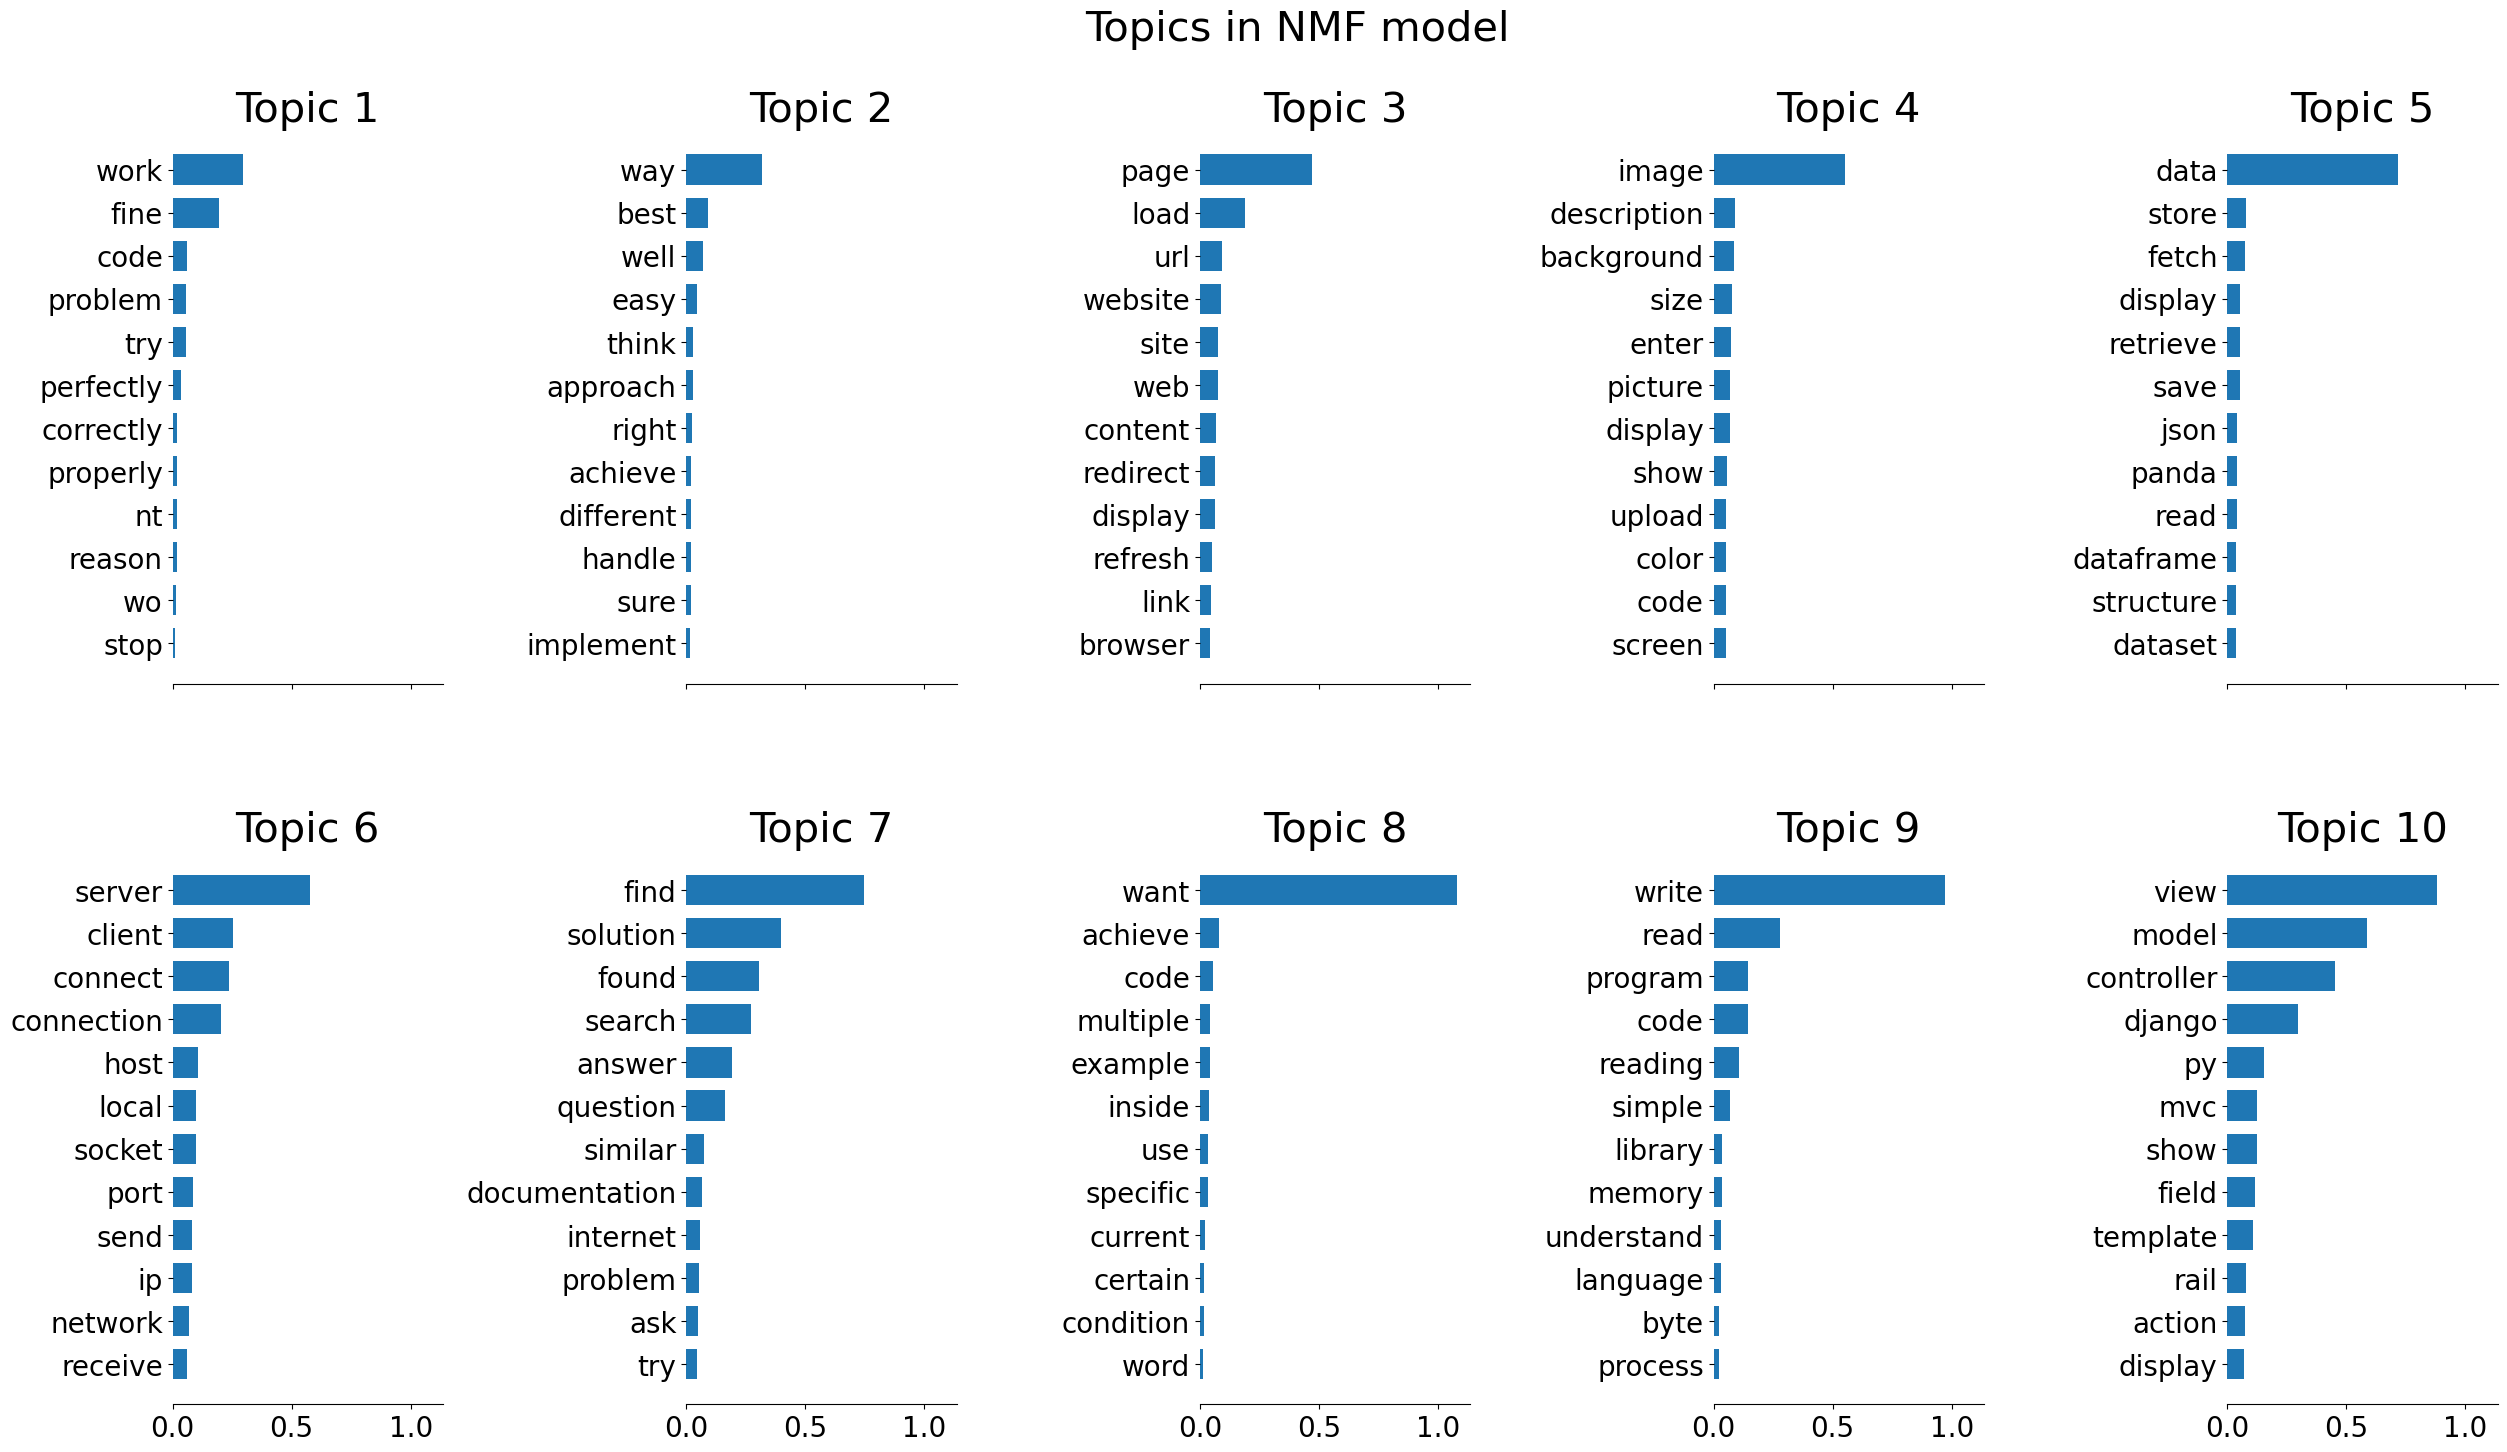

In [30]:
# Plot the 10 first topics
n_top_words =12
feature_names = vectorizer.get_feature_names()
fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(model_nmf.components_):
  if(topic_idx < 10):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('Topics in NMF model', fontsize=30)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()

### 4 Analyse supervisée <a class="anchor" id="AS_4"></a>

In [31]:
def metrics_report(model_name ,test_labels, y_score,fit_time, df): 
    """
    Compute metrics specific to multi-label
    classification problems with with ptobability 

    Parameters
    ----------------------------------------
    model_name : string
        Name of the  model
    df : DataFrame 
        DataFrame to accumulate result, if None : Create DataFrame.
    test_labels : array of true labels
    y_pred : array of predicted labels with ptobability
    fit_time: fit time of the model
    ----------------------------------------
    """   
    if(df is not None):
        df_sc = df
    else:
        df_sc = pd.DataFrame(index=["Av_precision(macro)","Av_precision(micro)","ROC_AUC(macro)",\
                                      "ROC_AUC(micro)","Fit_time"],columns=[model_name])
        
    scores = []
    scores.append(average_precision_score(test_labels, y_score,average='macro'))
    scores.append(average_precision_score(test_labels, y_score,average='micro'))
    scores.append(roc_auc_score(test_labels, y_score, multi_class="ovr" ,average='macro'))
    scores.append(roc_auc_score(test_labels, y_score, multi_class="ovr" ,average='micro'))
    scores.append(fit_time)
    df_sc[model_name] = scores
    
    return df_sc

In [32]:
def cut_off(test_labels,y_score):
  """
  Compute threshold for predicted a probability of multi-labels 

  Parameters
  ----------------------------------------
  test_labels : array of true labels
  y_score : array of predicted labels with probability
  ----------------------------------------
  """   
  n = y_score.shape[1]
  thresholds = np.zeros(n)
  # Compute fpr, tpr, thresholds and roc auc
  for j in range(n):
     # calculate roc curves
     fpr, tpr, ths = roc_curve(y_test[:,j], y_score[:,j])
     # calculate the statistic 
     dis = abs(1-fpr-tpr)
     # locate the index of the lower distance
     idx = np.argmin(dis)
     thresholds[j] = ths[idx]
  threshold = thresholds.max() 
  
  return threshold

#### 4.1.Modèle LogisticRegressor <a class="anchor" id="MLR_4_1"></a>

In [33]:
#Modèle LogisticRegressor
reg_logit_clf = OneVsRestClassifier(LogisticRegression(C=1.0,max_iter=100))
time1 = time.time()
reg_logit_clf.fit(X_train, y_train)
#Prediction
reg_logit_pred = reg_logit_clf.predict_proba(X_test)
fit_time = np.round(time.time() - time1,1)
df_performance = metrics_report("reg_logit", y_test, reg_logit_pred, fit_time,df=None)
print(df_performance)

                     reg_logit
Av_precision(macro)   0.638535
Av_precision(micro)   0.687121
ROC_AUC(macro)        0.953266
ROC_AUC(micro)        0.959608
Fit_time             20.400000


In [34]:
#seuil de classification
cut_off(y_test,reg_logit_pred)

0.16826610602990197

In [35]:
# Inverse transform
threshold = cut_off(y_test,reg_logit_pred)
reg_logit_preds = (reg_logit_pred>threshold)*1
y_pred_inversed = multilabel_binarizer.inverse_transform(reg_logit_preds)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)

print("-"*100)
print("Print 5 first predicted Tags vs true Tags")
print("-" * 100)
print("Predicted:", y_pred_inversed[0:4])
print("True:", y_test_inversed[0:4])

----------------------------------------------------------------------------------------------------
Print 5 first predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: [('asp', 'c#', 'net', 'service', 'web'), ('php',), ('cs', 'html', 'javascript', 'jquery', 'net', 'reactjs'), ('android', 'java')]
True: [('c#', 'net', 'service', 'web'), ('php',), ('javascript',), ('amazon', 'android', 'image', 'service', 'web')]


#### 4.2.Modèle SGDClassifier <a class="anchor" id="SGD_4_2"></a>

In [36]:
#Modèle SGDClassifier
sgd_clf = OneVsRestClassifier(SGDClassifier(alpha=1e-04, penalty='l1'))
time1 = time.time()
sgd_clf.fit(X_train, y_train)
#Prediction
sgd_clf_pred = sgd_clf.predict(X_test)
fit_time = np.round(time.time() - time1,1)
df_performance = metrics_report("sgd_clf", y_test, sgd_clf_pred, fit_time,df=df_performance)
print(df_performance)

                     reg_logit   sgd_clf
Av_precision(macro)   0.638535  0.356823
Av_precision(micro)   0.687121  0.382854
ROC_AUC(macro)        0.953266  0.706884
ROC_AUC(micro)        0.959608  0.725520
Fit_time             20.400000  3.900000


In [37]:
#seuil de classification
cut_off(y_test,sgd_clf_pred)

1.0

In [38]:
# Inverse transform
threshold = cut_off(y_test,sgd_clf_pred)
sgd_clf_preds = (sgd_clf_pred>threshold)*1
y_pred_inversed = multilabel_binarizer.inverse_transform(sgd_clf_preds)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)

print("-"*100)
print("Print 5 first predicted Tags vs true Tags")
print("-" * 100)
print("Predicted:", y_pred_inversed[0:4])
print("True:", y_test_inversed[0:4])

----------------------------------------------------------------------------------------------------
Print 5 first predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: [(), (), (), ()]
True: [('c#', 'net', 'service', 'web'), ('php',), ('javascript',), ('amazon', 'android', 'image', 'service', 'web')]


#### 4.3.Modèle KNN<a class="anchor" id="KNN_4_3"></a>

In [39]:
%%time
knn_clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
time1 = time.time()
#fit model
knn_clf.fit(X_train, y_train)
#predict with proba
knn_pred = knn_clf.predict_proba(X_test)
fit_time = np.round(time.time() - time1,1)
df_performance = metrics_report("knn", y_test, knn_pred, fit_time, df=df_performance)
print(df_performance)

                     reg_logit   sgd_clf         knn
Av_precision(macro)   0.638535  0.356823    0.330885
Av_precision(micro)   0.687121  0.382854    0.366672
ROC_AUC(macro)        0.953266  0.706884    0.783260
ROC_AUC(micro)        0.959608  0.725520    0.810584
Fit_time             20.400000  3.900000  468.700000
Wall time: 7min 49s


In [40]:
# Inverse transform
threshold = cut_off(y_test,knn_pred)
y_pred_inversed = multilabel_binarizer.inverse_transform((knn_pred>threshold)*1)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)

print("-"*100)
print("Print 5 first predicted Tags vs true Tags")
print("-" * 100)
print("Predicted:", y_pred_inversed[0:4])
print("True:", y_test_inversed[0:4])

----------------------------------------------------------------------------------------------------
Print 5 first predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: [(), (), ('html', 'javascript'), ('android', 'java')]
True: [('c#', 'net', 'service', 'web'), ('php',), ('javascript',), ('amazon', 'android', 'image', 'service', 'web')]


#### 4.4.Modèle SVM<a class="anchor" id="SVM_4_4"></a>

In [41]:
%%time
clf_svm_lin = OneVsRestClassifier(SVC(kernel="linear",probability=True))
time1 = time.time()
#fit model
clf_svm_lin.fit(X_train, y_train)
svm_pred = clf_svm_lin.predict_proba(X_test)
fit_time = np.round(time.time() - time1,1)
df_performance = metrics_report("svm_linear", y_test, svm_pred, fit_time, df=df_performance)
print(df_performance)

                     reg_logit   sgd_clf         knn   svm_linear
Av_precision(macro)   0.638535  0.356823    0.330885     0.637892
Av_precision(micro)   0.687121  0.382854    0.366672     0.700846
ROC_AUC(macro)        0.953266  0.706884    0.783260     0.930438
ROC_AUC(micro)        0.959608  0.725520    0.810584     0.946898
Fit_time             20.400000  3.900000  468.700000  9715.300000
Wall time: 2h 41min 55s


In [42]:
threshold = cut_off(y_test, svm_pred)
print(threshold)

0.13978642603921113


In [43]:
# Inverse transform
threshold = cut_off(y_test, svm_pred)
y_pred_inversed = multilabel_binarizer.inverse_transform((svm_pred>threshold)*1)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)

print("-"*100)
print("Print 5 first predicted Tags vs true Tags")
print("-" * 100)
print("Predicted:", y_pred_inversed[0:4])
print("True:", y_test_inversed[0:4])

----------------------------------------------------------------------------------------------------
Print 5 first predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: [('asp', 'c#', 'net', 'service', 'web'), ('data', 'php'), ('cs', 'html', 'javascript', 'jquery', 'reactjs'), ('amazon', 'android', 'java', 'service', 'web')]
True: [('c#', 'net', 'service', 'web'), ('php',), ('javascript',), ('amazon', 'android', 'image', 'service', 'web')]


#### 4.5.Modèle RandomForestClassifier <a class="anchor" id="RFC_4_5"></a>

In [44]:
%%time
rf_clf = OneVsRestClassifier(RandomForestClassifier(min_samples_split=4, n_estimators=100))
time1 = time.time()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict_proba(X_test)
fit_time = np.round(time.time() - time1,1)
df_performance = metrics_report("Random Forest", y_test, rf_pred,fit_time, df=df_performance)
print(df_performance)

                     reg_logit   sgd_clf         knn   svm_linear  \
Av_precision(macro)   0.638535  0.356823    0.330885     0.637892   
Av_precision(micro)   0.687121  0.382854    0.366672     0.700846   
ROC_AUC(macro)        0.953266  0.706884    0.783260     0.930438   
ROC_AUC(micro)        0.959608  0.725520    0.810584     0.946898   
Fit_time             20.400000  3.900000  468.700000  9715.300000   

                     Random Forest  
Av_precision(macro)       0.633360  
Av_precision(micro)       0.695304  
ROC_AUC(macro)            0.940854  
ROC_AUC(micro)            0.952019  
Fit_time                935.600000  
Wall time: 15min 36s


In [45]:
threshold = cut_off(y_test, rf_pred)
print(threshold)

0.20592063492063495


In [46]:
# Inverse transform
threshold = cut_off(y_test, svm_pred)
y_pred_inversed = multilabel_binarizer.inverse_transform((svm_pred>threshold)*1)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)

print("-"*100)
print("Print 5 first predicted Tags vs true Tags")
print("-" * 100)
print("Predicted:", y_pred_inversed[0:4])
print("True:", y_test_inversed[0:4])

----------------------------------------------------------------------------------------------------
Print 5 first predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: [('asp', 'c#', 'net', 'service', 'web'), ('data', 'php'), ('cs', 'html', 'javascript', 'jquery', 'reactjs'), ('amazon', 'android', 'java', 'service', 'web')]
True: [('c#', 'net', 'service', 'web'), ('php',), ('javascript',), ('amazon', 'android', 'image', 'service', 'web')]


#### 4.6.Modèle GradientBoostingClassifier <a class="anchor" id="GBC_4_6"></a>

In [47]:
%%time
gb_clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100))
time1 = time.time()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict_proba(X_test)
fit_time = np.round(time.time() - time1,1)
df_performance = metrics_report("GradientBoosting", y_test, gb_pred, fit_time, df=df_performance)
print(df_performance)

                     reg_logit   sgd_clf         knn   svm_linear  \
Av_precision(macro)   0.638535  0.356823    0.330885     0.637892   
Av_precision(micro)   0.687121  0.382854    0.366672     0.700846   
ROC_AUC(macro)        0.953266  0.706884    0.783260     0.930438   
ROC_AUC(micro)        0.959608  0.725520    0.810584     0.946898   
Fit_time             20.400000  3.900000  468.700000  9715.300000   

                     Random Forest  GradientBoosting  
Av_precision(macro)       0.633360          0.529016  
Av_precision(micro)       0.695304          0.579034  
ROC_AUC(macro)            0.940854          0.913487  
ROC_AUC(micro)            0.952019          0.930014  
Fit_time                935.600000       1781.000000  
Wall time: 29min 41s


In [48]:
threshold = cut_off(y_test, gb_pred)
print(threshold)

0.1226989028842345


In [49]:
# Inverse transform
threshold = cut_off(y_test, gb_pred)
y_pred_inversed = multilabel_binarizer.inverse_transform((gb_pred>threshold)*1)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)

print("-"*100)
print("Print 5 first predicted Tags vs true Tags")
print("-" * 100)
print("Predicted:", y_pred_inversed[0:4])
print("True:", y_test_inversed[0:4])

----------------------------------------------------------------------------------------------------
Print 5 first predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: [('service', 'web', 'window'), ('data', 'objective', 'php', 'service'), ('asp', 'cs', 'html', 'javascript', 'jquery', 'react', 'reactjs'), ('amazon', 'android', 'asp', 'java', 'service', 'web')]
True: [('c#', 'net', 'service', 'web'), ('php',), ('javascript',), ('amazon', 'android', 'image', 'service', 'web')]


In [50]:
results_perf = df_performance.T
print(results_perf)

                  Av_precision(macro)  Av_precision(micro)  ROC_AUC(macro)  \
reg_logit                    0.638535             0.687121        0.953266   
sgd_clf                      0.356823             0.382854        0.706884   
knn                          0.330885             0.366672        0.783260   
svm_linear                   0.637892             0.700846        0.930438   
Random Forest                0.633360             0.695304        0.940854   
GradientBoosting             0.529016             0.579034        0.913487   

                  ROC_AUC(micro)  Fit_time  
reg_logit               0.959608      20.4  
sgd_clf                 0.725520       3.9  
knn                     0.810584     468.7  
svm_linear              0.946898    9715.3  
Random Forest           0.952019     935.6  
GradientBoosting        0.930014    1781.0  


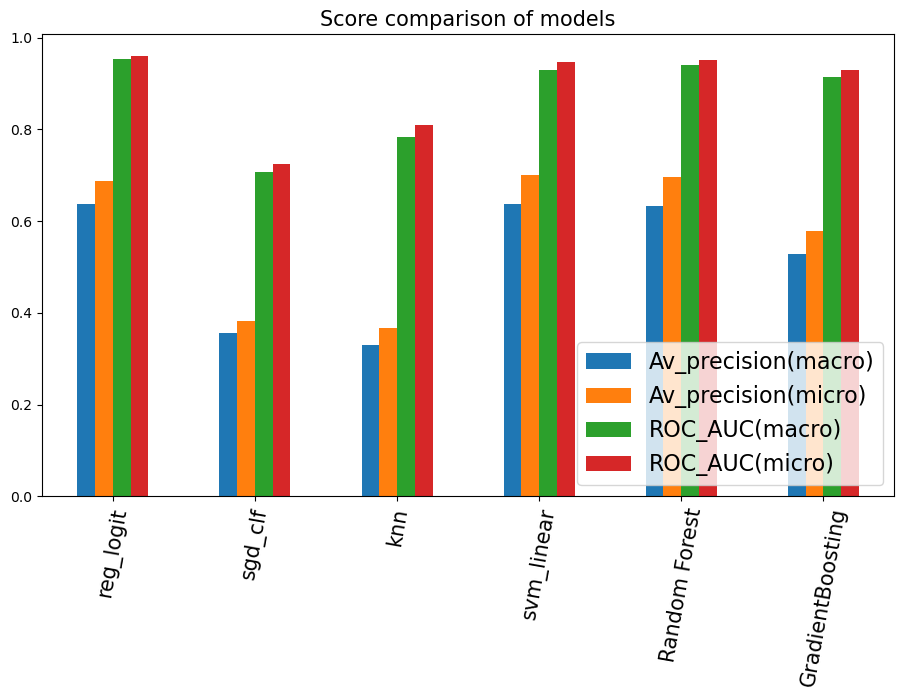

In [51]:
col_model =['Av_precision(macro)', 'Av_precision(micro)', 'ROC_AUC(macro)','ROC_AUC(micro)']
ax = results_perf[col_model].plot.bar(figsize= (11,6));
ax.legend(loc=4,fontsize=16);
ax.set_xticklabels(results_perf.index,rotation=80, fontsize=15);
ax.set_title('Score comparison of models', fontsize=15);

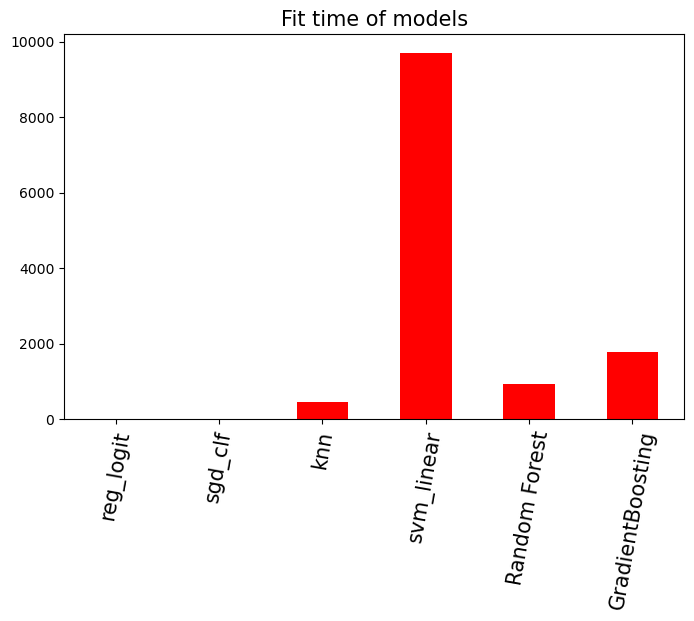

In [52]:
ax = results_perf['Fit_time'].plot.bar(figsize= (8,5),color='red');
ax.set_xticklabels(results_perf.index,rotation=80, fontsize=15);
ax.set_title('Fit time of models', fontsize=15);

In [53]:
th_lr = cut_off(y_test,reg_logit_pred)
count_lr = sum(((reg_logit_pred>th_lr)*1).T)
th_rf = cut_off(y_test,rf_pred)
count_rf= sum(((rf_pred>th_rf)*1).T)
th_svm = cut_off(y_test,svm_pred)
count_svm= sum(((svm_pred>th_svm)*1).T)

th_sgd_clf = cut_off(y_test,sgd_clf_pred)
count_sgd_clf = sum(((sgd_clf_pred>th_sgd_clf)*1).T)
th_knn = cut_off(y_test,knn_pred)
count_knn= sum(((knn_pred>th_knn)*1).T)
th_gb = cut_off(y_test,gb_pred)
count_gb= sum(((gb_pred>th_gb)*1).T)
print('le nombre de prédiction vide par la Regression Logistic est: ', sum(count_lr==0))
print('le nombre de prédiction vide par le Random Forest est:       ', sum(count_rf==0))
print('le nombre de prédiction vide par le SVM est:                 ', sum(count_svm==0))

print('le nombre de prédiction vide par la sgd est:                 ', sum(count_sgd_clf==0))
print('le nombre de prédiction vide par le knn est:                 ', sum(count_knn==0))
print('le nombre de prédiction vide par le GBoost:                  ', sum(count_gb==0))

le nombre de prédiction vide par la Regression Logistic est:  451
le nombre de prédiction vide par le Random Forest est:        492
le nombre de prédiction vide par le SVM est:                  145
le nombre de prédiction vide par la sgd est:                  8291
le nombre de prédiction vide par le knn est:                  1962
le nombre de prédiction vide par le GBoost:                   337


#### 4.7.word2vec embedding <a class="anchor" id="W2V_4_7"></a>

In [54]:
from gensim.models import word2vec

In [55]:
model_w2v = word2vec.Word2Vec(data.text_comb, vector_size=164, window=15, min_count=3, workers=7)
model_w2v.corpus_count

33164

In [56]:
vocab = model_w2v.wv.key_to_index
list(vocab)[:6]

['try', 'code', 'work', 'like', 'want', 'use']

In [57]:
model_w2v.wv.most_similar(['code'])

[('intend', 0.723177433013916),
 ('currently', 0.7156364917755127),
 ('fastapi', 0.7054072022438049),
 ('english', 0.700570821762085),
 ('one', 0.6880648136138916),
 ('ref', 0.6776843070983887),
 ('save', 0.6697412729263306),
 ('step', 0.6658649444580078),
 ('buddy', 0.6646555662155151),
 ('implement', 0.6612992286682129)]

In [58]:
def document_vector(doc):
    """Create document vectors by summing word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in model_w2v.wv.key_to_index]
    return np.sum(model_w2v.wv[doc], axis=0)

In [59]:
%%time
# Create train and test split
X_train, X_test, y_train, y_test = train_test_split(data.text_comb, y_binarized, test_size=0.2, random_state=42)
#
wv_train_feat = X_train.apply(document_vector)
wv_test_feat = X_test.apply(document_vector)
#
clf_lr = OneVsRestClassifier(LogisticRegression(solver='newton-cg'))
clf_lr.fit(list(wv_train_feat), y_train)
lr_pred = clf_lr.predict_proba(list(wv_test_feat))

Wall time: 21min 13s


In [60]:
df_perf_wv = metrics_report("reg_logit_wv", y_test, lr_pred,255, df=None)
print(df_perf_wv)

                     reg_logit_wv
Av_precision(macro)      0.497451
Av_precision(micro)      0.598583
ROC_AUC(macro)           0.920791
ROC_AUC(micro)           0.937111
Fit_time               255.000000


In [61]:
# paramètres à varier size et windiw
size = [64, 128, 256, 400]
W =[5, 10, 15, 20]
sc1 = []
sc2 = []
score1 = {}
score2 = {}
for w in W:
  for s in size: 
     model_w2v = word2vec.Word2Vec(data.text_comb, vector_size=s, window=w, min_count=3, workers=7)
     wv_train_feat, wv_test_feat, y_train, y_test = train_test_split(data.text_comb.apply(document_vector), y_binarized, test_size=0.2, random_state=42)
     clf_lr = OneVsRestClassifier(LogisticRegression(solver='newton-cg'))
     clf_lr.fit(list(wv_train_feat), y_train)
     lr_pred = clf_lr.predict_proba(list(wv_test_feat))
     sc1.append(average_precision_score(y_test, lr_pred,average='macro'))
     sc2.append(roc_auc_score(y_test, lr_pred, multi_class="ovr" ,average='macro'))
  score1[w] = sc1
  score2[w] = sc2
  sc1=[] 
  sc2=[] 

C:\Users\chouikhi\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chouikhi\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chouikhi\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\chouikhi\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chouikhi\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chouikhi\anaconda3\lib\site-packages\skl

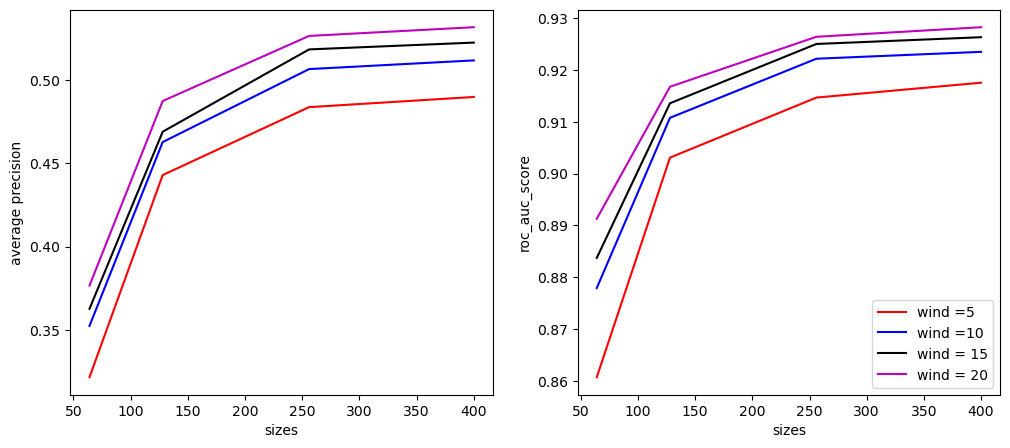

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(size, score1[5], c='r')
ax1.plot(size, score1[10], c='b')
ax1.plot(size, score1[15], c='k')
ax1.plot(size, score1[20], c='m')
ax1.set_xlabel('sizes')
ax1.set_ylabel('average precision')
ax2.legend(labels = ['wind =5','wind =10','wind = 15','wind = 20'])
ax2.plot(size, score2[5], c='r')
ax2.plot(size, score2[10], c='b')
ax2.plot(size, score2[15], c='k')
ax2.plot(size, score2[20], c='m')
ax2.set_xlabel('sizes')
ax2.set_ylabel('roc_auc_score')
ax2.legend(labels = ['wind =5','wind =10','wind = 15','wind = 20']);

In [63]:
dt = pd.DataFrame(df_performance.reg_logit).rename({'reg_logit':'reg_logit_tfidf'},axis='columns')
dt

,reg_logit_tfidf
Av_precision(macro),0.638535
Av_precision(micro),0.687121
ROC_AUC(macro),0.953266
ROC_AUC(micro),0.959608
Fit_time,20.400000


In [64]:
time1 = time.time()
model_w2v = word2vec.Word2Vec(data.text_comb, vector_size=264, window=20, min_count=3, workers=7, sg=1)
wv_train_feat, wv_test_feat, y_train, y_test = train_test_split(data.text_comb.apply(document_vector), y_binarized, test_size=0.2, random_state=42)
clf_lr = OneVsRestClassifier(LogisticRegression(solver='newton-cg'))
clf_lr.fit(list(wv_train_feat), y_train)
lr_pred = clf_lr.predict_proba(list(wv_test_feat))
fit_time = np.round(time.time() - time1,1)

In [65]:
df_perf_wv = metrics_report("reg_logit_w2v", y_test, lr_pred, fit_time, df=dt)
print(df_perf_wv)

                     reg_logit_tfidf  reg_logit_w2v
Av_precision(macro)         0.638535       0.582450
Av_precision(micro)         0.687121       0.662711
ROC_AUC(macro)              0.953266       0.936216
ROC_AUC(micro)              0.959608       0.949557
Fit_time                   20.400000     490.300000


#### 4.8.BERT embedding <a class="anchor" id="BERT_4_8"></a>

##### 4.8.1 BERT hub Tensorflow<a class="anchor" id="BHT_4_8_1"></a>

In [66]:
!pip install transformers

In [67]:
!pip install tensorflow_text

In [68]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Imports TF ops for preprocessing.

In [69]:
dt =data.copy()
dt.text_comb = dt.text_comb.apply(lambda text : " ".join(text))

In [70]:
BERT_MODEL = "https://tfhub.dev/google/experts/bert/wiki_books/2" 
PREPROCESS_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [71]:
preprocess = hub.load(PREPROCESS_MODEL)
bert = hub.load(BERT_MODEL)

In [72]:
#pour de raison de mémoire, la fonction suivante construit la matrice des features de Bert morceau par morceau

def feature_bert_tfh(sentences, key, b_size) :
    batch_size = b_size

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        inputs = preprocess(sentences[idx:idx+batch_size])
        feat = bert(inputs)[key]

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    if idx+batch_size<len(sentences):
       inputs = preprocess(sentences[idx+batch_size:len(sentences)])
       feat = bert(inputs)[key]
       features = np.concatenate((features,feat))      

    return features


In [73]:
#Régression logistique combinée avec les features de Bert

reg_logit_clf = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
time1=time.time()
feat_bert = feature_bert_tfh(dt.text_comb, 'pooled_output',128)

In [74]:
# split features
Bertfet_train, Bertfet_test, y_train, y_test = train_test_split(feat_bert, y_binarized, test_size=0.25)
reg_logit_clf.fit(Bertfet_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [75]:
#Prediction
bert_plr = reg_logit_clf.predict_proba(Bertfet_test)
fit_time = np.round(time.time() - time1,1)
df_perf_brt_tfh = metrics_report("reg_log_bert_tfhub", y_test, bert_plr,fit_time, df=df_perf_wv)
print(df_perf_brt_tfh)

                     reg_logit_tfidf  reg_logit_w2v  reg_log_bert_tfhub
Av_precision(macro)         0.638535       0.582450            0.323972
Av_precision(micro)         0.687121       0.662711            0.381712
ROC_AUC(macro)              0.953266       0.936216            0.843264
ROC_AUC(micro)              0.959608       0.949557            0.868713
Fit_time                   20.400000     490.300000        11625.300000


##### 4.8.2 Universal sentence-transformers  <a class="anchor" id="UST_4_8_2"></a>

In [1]:

# install -U sentence-transformers
!pip install -U sentence-transformers

In [77]:
from sentence_transformers import SentenceTransformer
#download a pretrained model
model_bert = SentenceTransformer('all-MiniLM-L6-v2')
#model_bert = SentenceTransformer('all-mpnet-base-v2')


In [78]:
def feature_bert_ST(sentences, b_size) :
    batch_size = b_size
    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = model_bert.encode(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

     
    if idx+batch_size<len(sentences):
    
       features = np.concatenate(features,model_bert.encode(sentences[idx+batch_size:len(sentences)]))

    return features

In [79]:
sentence_embeddings = []
for key in dt.text_comb.keys():
    try:
        embedding = model_bert.encode(dt.text_comb[key])
        sentence_embeddings.append(embedding)
    except KeyError:
        pass

%%time
batch_size = 64
sentence_embeddings = model_bert.encode(dt.text_comb)


In [80]:
%%time
batch_size = 64
# split features
time1 = time.time()
Bertfet_train, Bertfet_test, y_train, y_test = train_test_split(sentence_embeddings, y_binarized, test_size=0.25)
reg_logit_clf = OneVsRestClassifier(LogisticRegression())
reg_logit_clf.fit(Bertfet_train, y_train)


Wall time: 43.7 s


OneVsRestClassifier(estimator=LogisticRegression())

In [81]:
#Prediction
bert_pred_lr = reg_logit_clf.predict_proba(Bertfet_test)

fit_time = np.round(time.time() - time1,1)
df_perf_brt_ST = metrics_report("df_perf_brt_ST", y_test, bert_pred_lr, fit_time, df=df_perf_brt_tfh)
print(df_perf_brt_ST)

                     reg_logit_tfidf  reg_logit_w2v  reg_log_bert_tfhub  \
Av_precision(macro)         0.638535       0.582450            0.323972   
Av_precision(micro)         0.687121       0.662711            0.381712   
ROC_AUC(macro)              0.953266       0.936216            0.843264   
ROC_AUC(micro)              0.959608       0.949557            0.868713   
Fit_time                   20.400000     490.300000        11625.300000   

                     df_perf_brt_ST  
Av_precision(macro)        0.607526  
Av_precision(micro)        0.679381  
ROC_AUC(macro)             0.947413  
ROC_AUC(micro)             0.958335  
Fit_time                  45.100000  


##### 4.8.3 Universal Sentence Encoder  <a class="anchor" id="USE_4_8_3"></a>

In [82]:
#First download a pretrained model
Model_use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [83]:
def feature_USE(sentences, b_size) :
    batch_size = b_size

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = Model_use(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

     
    if idx+batch_size<len(sentences):
       feat = Model_use(sentences[idx+batch_size:len(sentences)])
       features = np.concatenate((features,feat))

    return features

In [84]:
%%time
time1 = time.time()
batch_size = 64
use_features = feature_USE(dt.text_comb, batch_size)

Wall time: 28.5 s


In [85]:
# split features
usefet_train, usefet_test, y_train, y_test = train_test_split(use_features, y_binarized, test_size=0.25)
reg_logit_clf = OneVsRestClassifier(LogisticRegression())
reg_logit_clf.fit(usefet_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression())

In [86]:
#Prediction
usepred_lr = reg_logit_clf.predict_proba(usefet_test)

fit_time = np.round(time.time() - time1,1)
df_perf_use = metrics_report("reg_logit with use", y_test, usepred_lr, fit_time, df=df_perf_brt_ST)
print(df_perf_use)

                     reg_logit_tfidf  reg_logit_w2v  reg_log_bert_tfhub  \
Av_precision(macro)         0.638535       0.582450            0.323972   
Av_precision(micro)         0.687121       0.662711            0.381712   
ROC_AUC(macro)              0.953266       0.936216            0.843264   
ROC_AUC(micro)              0.959608       0.949557            0.868713   
Fit_time                   20.400000     490.300000        11625.300000   

                     df_perf_brt_ST  reg_logit with use  
Av_precision(macro)        0.607526            0.597761  
Av_precision(micro)        0.679381            0.672993  
ROC_AUC(macro)             0.947413            0.943246  
ROC_AUC(micro)             0.958335            0.954959  
Fit_time                  45.100000           82.600000  


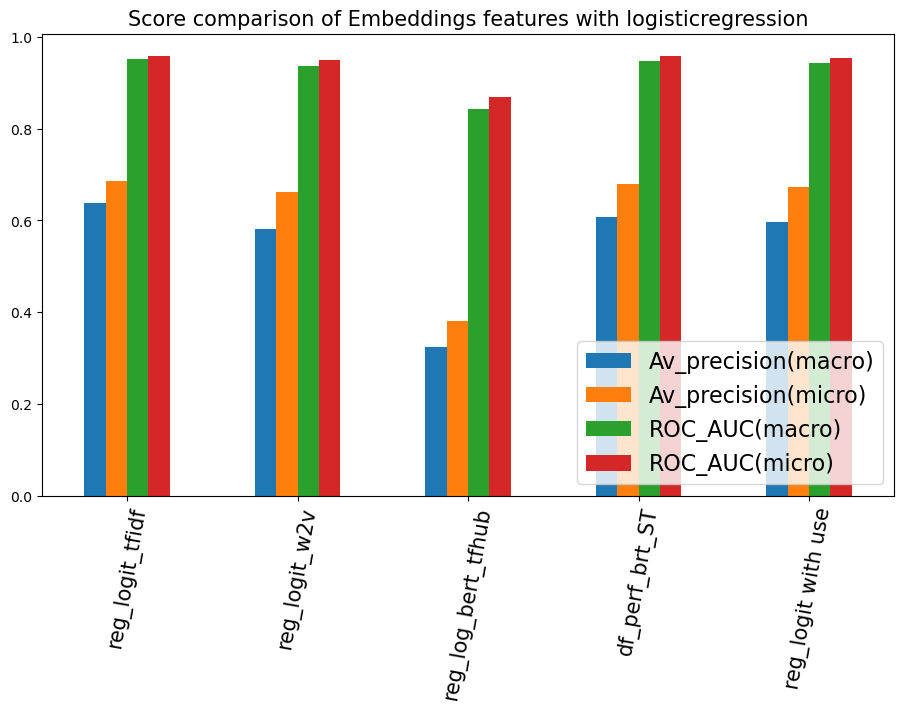

In [87]:
df_result = df_perf_use.T
col_model =['Av_precision(macro)', 'Av_precision(micro)', 'ROC_AUC(macro)','ROC_AUC(micro)']
ax = df_result[col_model].plot.bar(figsize= (11,6));
ax.legend(loc=4,fontsize=16);
ax.set_xticklabels(df_result.index,rotation=80, fontsize=15);
ax.set_title('Score comparison of Embeddings features with logisticregression', fontsize=15);

Text(0.5, 1.0, 'Fit time of Embeddings features with logisticregression')

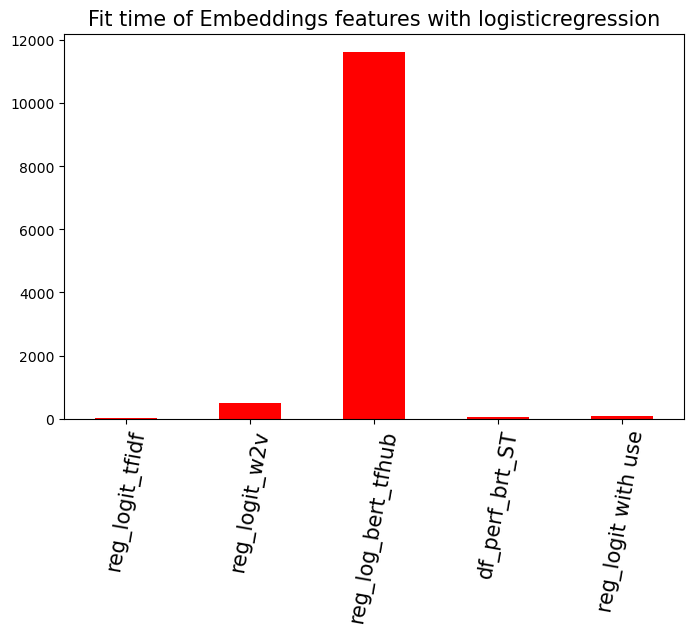

In [88]:
ax = df_result['Fit_time'].plot.bar(figsize= (8,5),color='red');
ax.set_xticklabels(df_result.index,rotation=80, fontsize=15);
ax.set_title('Fit time of Embeddings features with logisticregression', fontsize=15)